In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
print("Success")

Success


## Data Preprocessing

### Traning Image Preprocessing

In [9]:
training_set =tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
    
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [10]:
validation_set =tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
    
)

Found 17572 files belonging to 38 classes.


In [11]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [12]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 77.25  82.5   75.  ]
   [ 73.5   75.    70.5 ]
   [ 67.    64.    61.5 ]
   ...
   [ 76.    78.25  89.25]
   [ 72.25  74.5   85.5 ]
   [ 73.25  75.5   86.5 ]]

  [[140.25 147.75 135.  ]
   [150.   153.25 144.25]
   [132.75 131.5  126.75]
   ...
   [158.25 162.25 173.25]
   [147.   151.   162.  ]
   [148.75 152.75 163.75]]

  [[133.   142.5  127.  ]
   [145.75 151.5  138.5 ]
   [143.75 144.75 136.75]
   ...
   [150.   154.   166.  ]
   [153.25 157.25 169.25]
   [148.   152.   164.  ]]

  ...

  [[ 90.    89.    95.  ]
   [ 95.5   94.5  100.5 ]
   [ 92.75  91.75  97.75]
   ...
   [185.25 161.75 141.5 ]
   [202.75 179.5  161.25]
   [191.   168.   149.5 ]]

  [[ 88.25  87.25  93.25]
   [ 93.75  92.75  98.75]
   [ 94.5   93.5   99.5 ]
   ...
   [145.25 139.75 108.25]
   [173.5  161.5  131.75]
   [185.   167.75 138.  ]]

  [[ 89.    88.    94.  ]
   [ 93.5   92.5   98.5 ]
   [ 95.    94.   100.  ]
   ...
   [107.5  120.75  79.25]
   [124.   128.75  88.25]
   [140.25 139.   10

### Building Model

In [13]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [14]:
model = Sequential()

In [15]:
## Building convolution layer

In [ ]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [18]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [19]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [20]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [21]:
model.add(Dropout(0.25)) #to avoid overfitting

In [22]:
model.add(Flatten())

In [23]:
model.add(Dense(units=1500,activation='relu'))

In [24]:
model.add(Dropout(0.4))

In [25]:
#output layer
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## Model training

In [28]:
training_history= model.fit(x=training_set,validation_data=validation_set, epochs=10)
print("Success")

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 854s 387ms/step - accuracy: 0.3760 - loss: 2.2347 - val_accuracy: 0.7975 - val_loss: 0.6424
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 876s 399ms/step - accuracy: 0.8254 - loss: 0.5570 - val_accuracy: 0.8842 - val_loss: 0.3582
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 953s 434ms/step - accuracy: 0.9002 - loss: 0.3064 - val_accuracy: 0.9209 - val_loss: 0.2525
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 939s 427ms/step - accuracy: 0.9364 - loss: 0.1996 - val_accuracy: 0.9538 - val_loss: 0.1458
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 930s 423ms/step - accuracy: 0.9488 - loss: 0.1533 - val_accuracy: 0.9531 - val_loss: 0.1390
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 930s 423ms/step - accuracy: 0.9636 - loss: 0.1125 - val_accuracy: 0.9537 - val_loss: 0.1488
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 932s 424ms/step - accuracy: 0.9668 - loss: 0.1035 - val_accuracy: 0.9570 - val_loss: 0.1373
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 931s 424ms/step - ac

## Model Evaluation

In [29]:
#Model Evaluation on training set
train_loss,train_acc=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 220s 100ms/step - accuracy: 0.9903 - loss: 0.0297


In [30]:
print(train_loss,train_acc)

0.025710662826895714 0.9918344020843506


In [31]:
#Model Evaluation on validation set
val_loss,val_acc=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 55s 100ms/step - accuracy: 0.9664 - loss: 0.1145


In [32]:
print(val_loss,val_acc)

0.1161041408777237 0.965228796005249


## Saving Model

In [33]:
model.save("trained_model.keras")

In [34]:
training_history.history

{'accuracy': [0.5742513537406921,
  0.8512269854545593,
  0.9094387888908386,
  0.9385305047035217,
  0.9521445631980896,
  0.9643502235412598,
  0.9693292379379272,
  0.9745216369628906,
  0.9771676659584045,
  0.9807810187339783],
 'loss': [1.4526370763778687,
  0.4708895981311798,
  0.2793716490268707,
  0.1892605572938919,
  0.1447901427745819,
  0.1085282564163208,
  0.09556735306978226,
  0.0782381147146225,
  0.06957738846540451,
  0.05879712849855423],
 'val_accuracy': [0.797518789768219,
  0.8841907382011414,
  0.9208968877792358,
  0.9537901282310486,
  0.9531072378158569,
  0.9536762833595276,
  0.9569770097732544,
  0.9569770097732544,
  0.955895721912384,
  0.965228796005249],
 'val_loss': [0.6424077749252319,
  0.35824331641197205,
  0.25249844789505005,
  0.14580820500850677,
  0.13895730674266815,
  0.14882971346378326,
  0.13725319504737854,
  0.14371073246002197,
  0.14679425954818726,
  0.11610405147075653]}

In [35]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history, f)

### Accuracy Visualization

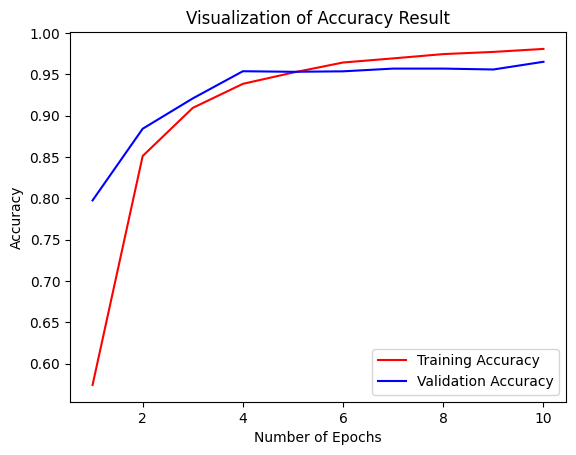

In [45]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Further Evaluation

In [11]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [2]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
    
)

Found 17572 files belonging to 38 classes.


In [5]:
y_pred= model.predict(test_set)
y_pred

550/550 ━━━━━━━━━━━━━━━━━━━━ 63s 114ms/step


array([[1.0000000e+00, 8.4915148e-14, 4.9976045e-16, ..., 3.9462813e-20,
        1.0114272e-18, 1.0030211e-17],
       [9.9990094e-01, 3.1418292e-09, 5.1347633e-12, ..., 6.2246703e-14,
        1.7653167e-13, 9.1256343e-13],
       [1.0000000e+00, 9.1018235e-12, 5.0618439e-15, ..., 1.2680812e-19,
        1.7653282e-15, 9.1217920e-16],
       ...,
       [1.0951914e-11, 3.3659645e-15, 1.6001731e-11, ..., 6.4373454e-14,
        4.6759742e-13, 9.9999988e-01],
       [4.0780815e-10, 1.2539178e-14, 3.0153095e-11, ..., 1.7741404e-12,
        5.0390976e-12, 9.9999976e-01],
       [1.1660974e-17, 9.8969563e-18, 8.9417046e-17, ..., 5.4006056e-17,
        3.6640189e-16, 1.0000000e+00]], dtype=float32)

In [40]:
y_pred.shape

(17572, 38)

In [18]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories 

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [7]:
true_categories= tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [3]:
from tensorflow import keras
model = keras.models.load_model('trained_model.keras')

In [8]:
Y_true=tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
print(classification_report(Y_true,predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.96      0.95       504
                                 Apple___Black_rot       0.98      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.98       440
                                   Apple___healthy       0.97      0.95      0.96       502
                               Blueberry___healthy       1.00      0.98      0.99       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.94      0.94       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.95      0.

In [20]:
cm=confusion_matrix(Y_true,predicted_categories)
cm


array([[482,   1,   0, ...,   0,   0,   0],
       [  1, 491,   0, ...,   0,   0,   0],
       [  1,   0, 429, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 489,   0,   0],
       [  0,   0,   0, ...,   0, 442,   0],
       [  0,   0,   0, ...,   0,   0, 476]], dtype=int64)

### Confusion Matrix Visualization

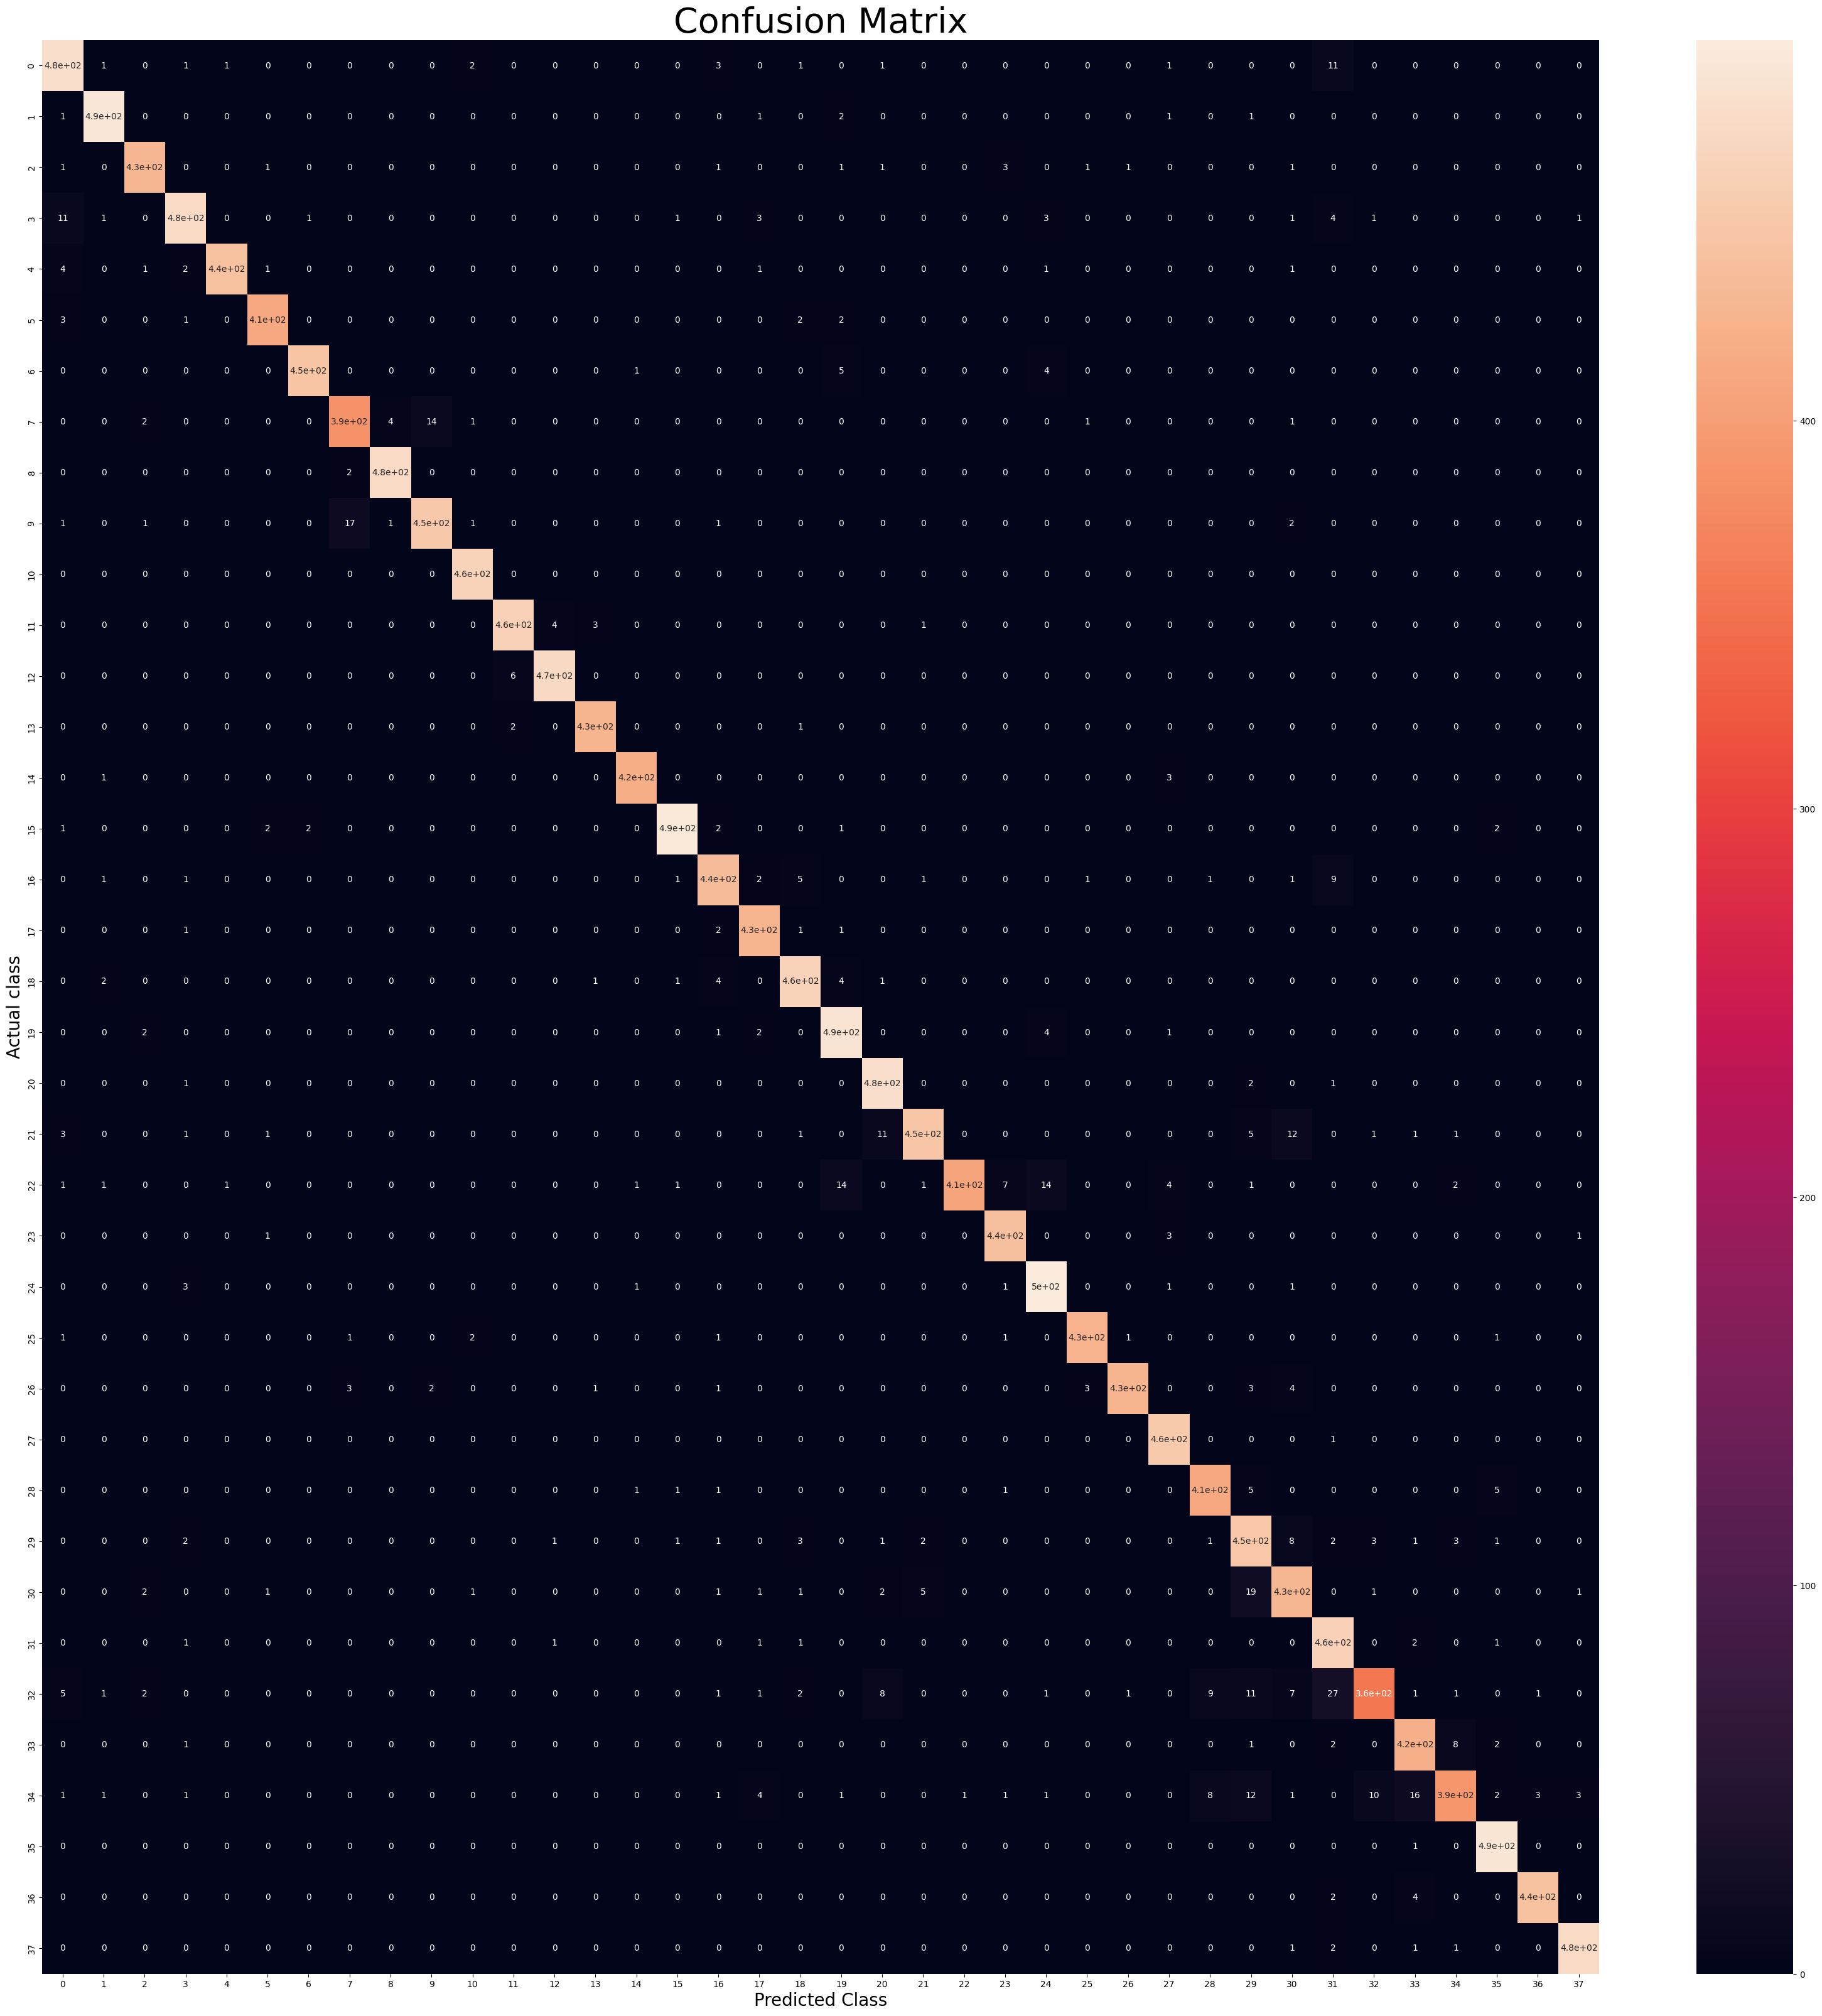

In [36]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual class",fontsize=20)
plt.title("Confusion Matrix",fontsize=40)
plt.show()